#Final Project

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [89]:
#store data for training and testing sets
Training_dict = {}
Testing_dict = {}

# read files, nrows = 100 corresponds to first 0.1 sec of data, stores it in the dicts using the file name as key
for file in sorted(os.listdir(r"/Users/Daniel A/OneDrive/ENME485/dataset/test/data")):
     Testing_dict[file] = pd.read_csv(r"/Users/Daniel A/OneDrive/ENME485/dataset/test/data/" + file, header = 0, sep = ',', nrows=100)
    
for file in sorted(os.listdir(r"/Users/Daniel A/OneDrive/ENME485/dataset/train/data")):
    Training_dict[file] = pd.read_csv(r"/Users/Daniel A/OneDrive/ENME485/dataset/train/data/" + file, header = 0, sep = ',', nrows=100)
    
# Read Labels for test set, the labels are in the second row of the excel file , header = 1
test_label = pd.read_excel(r"/Users/Daniel A/OneDrive/ENME485/dataset/test/labels_spacecraft.xlsx", header = 1)

# Read Labels for training set , it also renames the columns of the dataframe for clarity
train_label = pd.read_excel(r"/Users/Daniel A/OneDrive/ENME485/dataset/train/labels.xlsx", header = 1)
train_label.rename(columns={ train_label.columns[0]: "Case", train_label.columns[1]: "Spacecraft", train_label.columns[2]: "Condition"}, inplace=True)
#iterates throguh the rows of the train labels, creats a list called train_label_true
train_label_true = []
for i in np.arange(177):
     if train_label["Condition"][i] == "Normal":
          train_label_true.append(1)
     else:
          train_label_true.append(0) 

training_keys = sorted(os.listdir(r"/Users/Daniel A/OneDrive/ENME485/dataset/train/data"))
testing_keys = sorted(os.listdir(r"/Users/Daniel A/OneDrive/ENME485/dataset/test/data"))
#reads the cvs containing the answers for the testing set 
answer = pd.read_csv(r"/Users/Daniel A/OneDrive/ENME485/dataset/test/answer.csv", header = 0, sep = ',')
#iterates through the rows of answer and creats a list, where each element is 1 if the test condintion is normal and 0 in not
test_label_true = []
for index, row in answer.iterrows():
     if answer["Test condition"][index] == "Normal":
        test_label_true.append(1)
     else:
        test_label_true.append(0)

test_label_condition = []
for index, row in answer.iterrows():
     if "valve fault" in answer["Test condition"][index]:
        test_label_condition.append(1)
     if "bubble anomaly" in answer["Test condition"][index]:
        test_label_condition.append(2)
     if answer["Test condition"][index] == "Unknown anomaly":
        test_label_condition.append(3)

In [90]:
print(training_keys)

['Case001.csv', 'Case002.csv', 'Case003.csv', 'Case004.csv', 'Case005.csv', 'Case006.csv', 'Case007.csv', 'Case008.csv', 'Case009.csv', 'Case010.csv', 'Case011.csv', 'Case012.csv', 'Case013.csv', 'Case014.csv', 'Case015.csv', 'Case016.csv', 'Case017.csv', 'Case018.csv', 'Case019.csv', 'Case020.csv', 'Case021.csv', 'Case022.csv', 'Case023.csv', 'Case024.csv', 'Case025.csv', 'Case026.csv', 'Case027.csv', 'Case028.csv', 'Case029.csv', 'Case030.csv', 'Case031.csv', 'Case032.csv', 'Case033.csv', 'Case034.csv', 'Case035.csv', 'Case036.csv', 'Case037.csv', 'Case038.csv', 'Case039.csv', 'Case040.csv', 'Case041.csv', 'Case042.csv', 'Case043.csv', 'Case044.csv', 'Case045.csv', 'Case046.csv', 'Case047.csv', 'Case048.csv', 'Case049.csv', 'Case050.csv', 'Case051.csv', 'Case052.csv', 'Case053.csv', 'Case054.csv', 'Case055.csv', 'Case056.csv', 'Case057.csv', 'Case058.csv', 'Case059.csv', 'Case060.csv', 'Case061.csv', 'Case062.csv', 'Case063.csv', 'Case064.csv', 'Case065.csv', 'Case066.csv', 'Case067.

In [91]:
print(test_label_condition)

[2, 1, 1, 3, 2, 1, 1, 3, 2, 2, 2, 1, 3, 1, 2, 1, 3, 2, 1, 1, 1, 2, 3, 2, 2, 3]


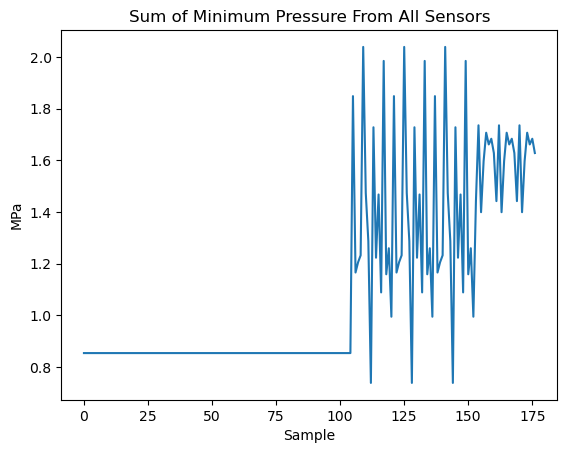

In [92]:
def get_min_pressure(dict, keys):
    min_pressure = np.zeros(np.size(keys))
    for i in range(np.size(keys)):
        df = dict[keys[i]]

        pressure_sensor_1 = df['P1']
        pressure_sensor_2 = df['P2']
        pressure_sensor_3 = df['P3']
        pressure_sensor_4 = df['P4']
        pressure_sensor_5 = df['P5']
        pressure_sensor_6 = df['P6']
        pressure_sensor_7 = df['P7']

        min_pressure[i] = np.min(pressure_sensor_1) + np.min(pressure_sensor_2) + np.min(pressure_sensor_3) + np.min(pressure_sensor_4) + np.min(pressure_sensor_5) + np.min(pressure_sensor_6) + np.min(pressure_sensor_7)

    return min_pressure

min_pressure_training = get_min_pressure(Training_dict, training_keys)

plt.plot(np.arange(177), min_pressure_training)
plt.title('Sum of Minimum Pressure From All Sensors')
plt.xlabel('Sample')
plt.ylabel('MPa')
plt.show()



In [93]:
def threshold_classifier(min_pressure):
    label_condition = []
    label_pred = []
    
    threshold = 0.8533
    epsilon = 1e-3

    for val in min_pressure:
        if val > threshold + epsilon:
            label_condition.append("Fault")
            label_pred.append(0)
        elif val < threshold - epsilon:
            label_condition.append("Fault")
            label_pred.append(0)
        else:
            label_condition.append("Normal")
            label_pred.append(1)
    
    return label_pred, label_condition
train_label_pred, train_label_condition = threshold_classifier(min_pressure_training)

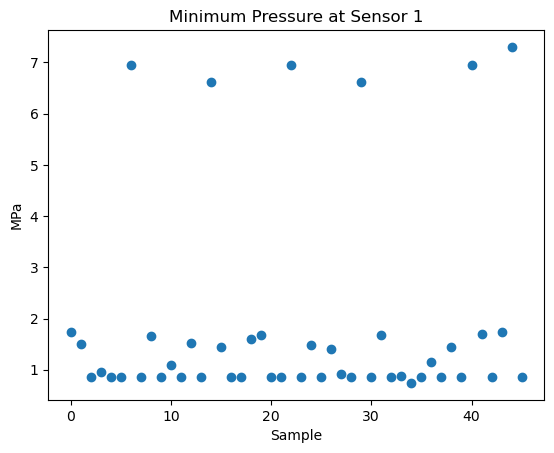

[1.7358758  1.50408208 0.85333871 0.95892592 0.85333871 0.85333871
 6.95227779 0.85333871 1.66181224 0.85333871 1.08479807 0.85333871
 1.51711574 0.85333871 6.62540727 1.44215626 0.85333871 0.85333871
 1.59738425 1.6838266  0.85333871 0.85584552 6.95227779 0.85333871
 1.48205621 0.85333871 1.39924678 0.91025716 0.85333871 6.62540727
 0.85333871 1.6838266  0.85333871 0.88115959 0.74285953 0.85333871
 1.14179411 0.85333871 1.44215626 0.85333871 6.95227779 1.70713693
 0.85333871 1.7358758  7.30378507 0.85333871]


In [94]:
min_pressure_testing = get_min_pressure(Testing_dict, testing_keys)

plt.scatter(np.arange(46), min_pressure_testing) # normal condition min pressure = 0.4622
plt.title('Minimum Pressure at Sensor 1')
plt.xlabel('Sample')
plt.ylabel('MPa')
plt.show()
print(min_pressure_testing)

Shape of X_train: (1239, 1)
Shape of y_train: (177,)


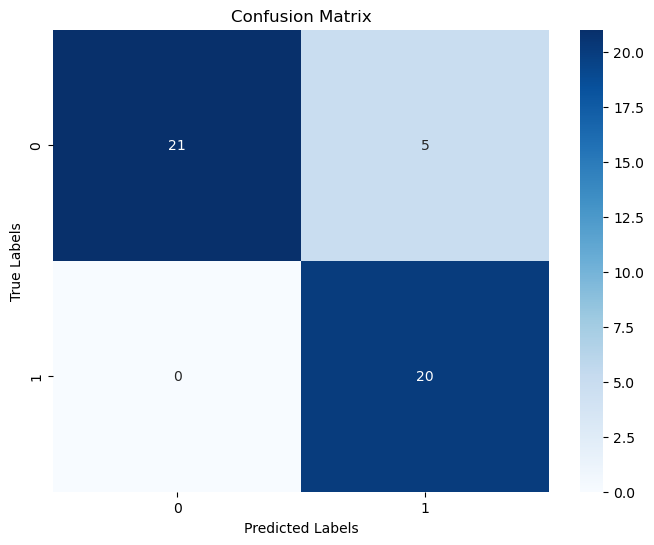

Confusion Matrix:
[[21  5]
 [ 0 20]]
              precision    recall  f1-score   support

           0       1.00      0.81      0.89        26
           1       0.80      1.00      0.89        20

    accuracy                           0.89        46
   macro avg       0.90      0.90      0.89        46
weighted avg       0.91      0.89      0.89        46



In [125]:
# SVM min pressure
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns

x_train = np.array(min_pressure_training).reshape(-1, 1)
y_train = np.array(train_label_true)
y_test = np.array(test_label_true)
x_test = np.array(min_pressure_testing).reshape(-1, 1)

#scaler = StandardScaler()
#x_train_scaled = scaler.fit_transform(x_train)
#x_test_scaled = scaler.transform(x_test)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(x_train, y_train)
y_pred = svm.predict(x_test)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=svm.classes_,
            yticklabels=svm.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()



# Calculate and print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print classification report
print(classification_report(y_test, y_pred))

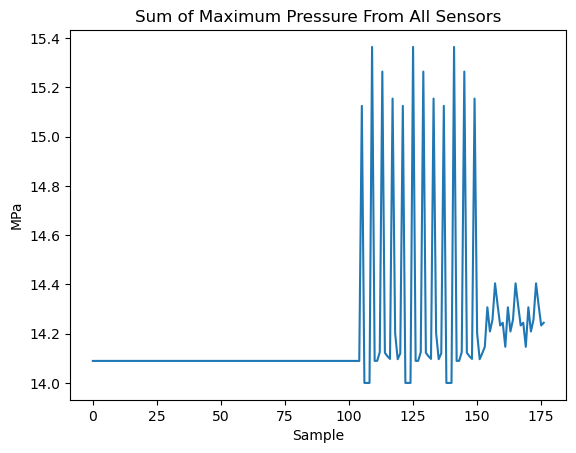

In [96]:
def get_max_pressure(dict, keys):
    max_pressure = np.zeros(np.size(keys))
    for i in range(np.size(keys)):
        df = dict[keys[i]]

        pressure_sensor_1 = df['P1']
        pressure_sensor_2 = df['P2']
        pressure_sensor_3 = df['P3']
        pressure_sensor_4 = df['P4']
        pressure_sensor_5 = df['P5']
        pressure_sensor_6 = df['P6']
        pressure_sensor_7 = df['P7']

        max_pressure[i] = np.max(pressure_sensor_1) + np.max(pressure_sensor_2) + np.max(pressure_sensor_3) + np.max(pressure_sensor_4) + np.max(pressure_sensor_5) + np.max(pressure_sensor_6) + np.max(pressure_sensor_7)

    return max_pressure
max_pressure_training = get_max_pressure(Training_dict, training_keys)

plt.plot(np.arange(177), max_pressure_training)
plt.title('Sum of Maximum Pressure From All Sensors')
plt.xlabel('Sample')
plt.ylabel('MPa')
plt.show()

In [97]:
def threshold_classifier1(max_pressure):
    label_condition = []
    label_pred = []
    
    threshold = 14.089330
    epsilon = 1e-3

    for val in max_pressure:
        if val > threshold + epsilon:
            label_condition.append("Fault")
            label_pred.append(0)
        elif val < threshold - epsilon:
            label_condition.append("Fault")
            label_pred.append(0)
        else:
            label_condition.append("Normal")
            label_pred.append(1)
    
    return label_pred, label_condition
train_label_pred, train_label_condition = threshold_classifier(max_pressure_training)

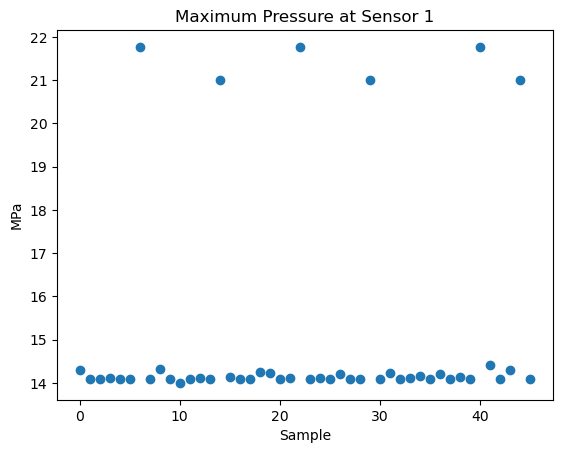

[14.30702208 14.08073864 14.08933098 14.10565261 14.08933098 14.08933098
 21.77000042 14.08933098 14.3158498  14.08933098 14.00056408 14.08933098
 14.1102199  14.08933098 21.         14.14648355 14.08933098 14.08933098
 14.25677225 14.23317923 14.08933098 14.12050239 21.77000042 14.08933098
 14.11123375 14.08933098 14.20889621 14.08482845 14.08933098 21.
 14.08933098 14.23317923 14.08933098 14.11928363 14.15542425 14.08933098
 14.20471885 14.08933098 14.14648355 14.08933098 21.77000042 14.40420027
 14.08933098 14.30702208 21.         14.08933098]


In [98]:
max_pressure_testing = get_max_pressure(Testing_dict, testing_keys)

plt.scatter(np.arange(46), max_pressure_testing) # normal condition 
plt.title('Maximum Pressure at Sensor 1')
plt.xlabel('Sample')
plt.ylabel('MPa')
plt.show()
print(max_pressure_testing)

In [100]:
print(train_label_true)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [101]:
print(np.array(test_label_true))

[0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0
 1 0 1 0 0 1 0 0 1]


Shape of X_train: (1239, 1)
Shape of y_train: (177,)


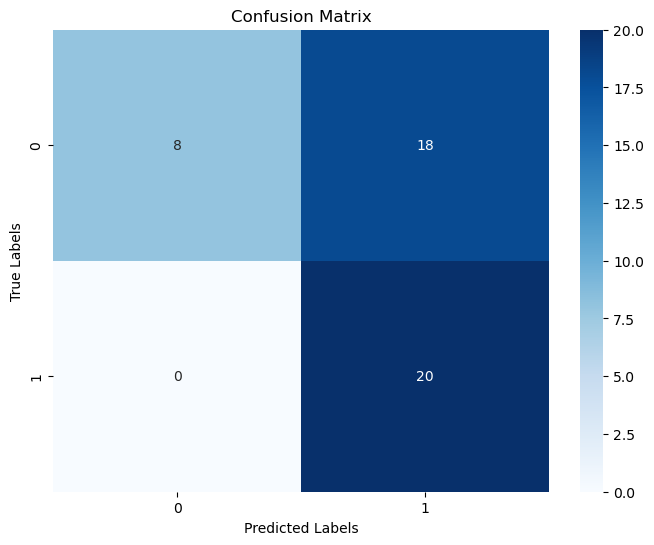

Confusion Matrix:
[[ 8 18]
 [ 0 20]]
              precision    recall  f1-score   support

           0       1.00      0.31      0.47        26
           1       0.53      1.00      0.69        20

    accuracy                           0.61        46
   macro avg       0.76      0.65      0.58        46
weighted avg       0.79      0.61      0.57        46



In [122]:
# SVM max pressure
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns

x_train = np.array(max_pressure_training).reshape(-1, 1)
y_train = np.array(train_label_true)
y_test = np.array(test_label_true)
x_test = np.array(max_pressure_testing).reshape(-1, 1)
# Check the shapes to identify any inconsistencies
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

#scaler = StandardScaler()
#x_train_scaled = scaler.fit_transform(x_train)
#x_test_scaled = scaler.transform(x_test)

svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(x_train, y_train)
y_pred = svm.predict(x_test)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=svm.classes_,
            yticklabels=svm.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()



# Calculate and print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print classification report
print(classification_report(y_test, y_pred))

In [102]:
import matplotlib.pyplot as plt

# Extract the data from the DataFrame
df = Training_dict[training_keys[145]]

# Assuming your DataFrame has columns named 'time' and 'pressure_sensor_1' through 'pressure_sensor_7'
time = df['TIME']
pressure_sensor_1 = df['P1']
pressure_sensor_2 = df['P2']
pressure_sensor_3 = df['P3']
pressure_sensor_4 = df['P4']
pressure_sensor_5 = df['P5']
pressure_sensor_6 = df['P6']
pressure_sensor_7 = df['P7']

In [106]:
Max_values = [[] for _ in range(7)]
Time_min = [[] for _ in range(7)]
Pressure_Drop = [[] for _ in range(7)]

Max_values_test = [[] for _ in range(7)]
Time_min_test = [[] for _ in range(7)]
Pressure_Drop_Test = [[] for _ in range(7)]
for key in training_keys:
    df = Training_dict[key]
    i = 0
    for i in range(7):
        P = df.iloc[:, i+1].astype(float)
        time = df.iloc[:, 0].astype(float)
        Max_values[i].append(np.max(P))
        Time_min[i].append(time[np.argmin(P)])
        Pressure_Drop[i].append(2 - np.min(P))
        i+=1

for key in testing_keys:
    df = Testing_dict[key]
    i = 0
    for i in range(7):
        P = df.iloc[:, i+1].astype(float)
        time = df.iloc[:, 0].astype(float)
        Max_values_test[i].append(np.max(P))
        Time_min_test[i].append(time[np.argmin(P)])
        Pressure_Drop_Test[i].append(2 - np.min(P))
        i+=1      

In [ ]:
import matplotlib.pyplot as plt

def plot_features(values, title, y):
    # Create a list of indices from 1 to the length of MaxHealth (or MaxUnhealth)
    indices = list(range(1, len(values[0]) + 1))

    # Create a new figure for each player
    for i in range(7):
        plt.figure()  # Create a new figure
        plt.plot(indices, values[i], label=f'P{i+1}', marker='o')

        # Adding labels and legend for each plot
        plt.xlabel('Sample')
        plt.ylabel(f'{y}')
        plt.title(f'{title} - P{i+1}')
        plt.legend()

    # Show the plots
    plt.show()

# Example usage
plot_features(Max_values, "Maximum Pressure", "Pressure (MPa)")
plot_features(Time_min, "Time which the system takes to reach minimum pressure", "Time (s)")
plot_features(Pressure_Drop, "Pressure Drop", "Pressure Drop (MPa)")
plot_features(Pressure_Drop_Test, "Pressure Drop Test", "Pressure Drop (MPa)")

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Assuming train_label_true and test_label_true are your labels
# and Max_values, Time_min, Pressure_Drop are your features

# Combine features for each sample
#X_train = np.concatenate((Max_values, Time_min, Pressure_Drop), axis=1)
#X_test = np.concatenate((Max_values_test, Time_min_test, Pressure_Drop_Test), axis=1)
x_train = np.concatenate(Pressure_Drop).reshape(-1, 1)
x_test = np.concatenate(Pressure_Drop_Test).reshape(-1, 1)

# Assuming train_label_true and test_label_true are your labels
y_train = np.array(train_label_true)
y_test = np.array(test_label_true)
# Check the shapes to identify any inconsistencies
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(x_train, y_train)
y_pred = svm.predict(x_test)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=svm.classes_,
            yticklabels=svm.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Calculate and print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print classification report
print(classification_report(y_test, y_pred))

Shape of X_train: (1239, 1)
Shape of y_train: (177,)


ValueError: Found input variables with inconsistent numbers of samples: [1239, 177]